# **G4-DEEP**

If data is needed to be imported from googe drive, run this cell, otherwise skip it.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.utils import shuffle
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from matplotlib import pyplot as plt
import pathlib

In [3]:
from numpy import array
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

# Input Files

Only, target_file, file and genome_file are necessary, others are optional. If all the files have same path, enter the path in the variable "path" as string and then just enter the file names in their specific variables as strings. Else, you may enter complete file path with file names as strings in their specific variables and leaving the "path" option as -> "".

In [4]:
cell_line=""
analysis_name=""
path=""
target_file=""
file=""
chip_file=""
Na_seq_file=""
genome_file=""
Li_seq_file=""

Enter Histone Modifcations under the variable "HMs", in the format;
HMs= "HM1", "HM2", "HM3", ......, "HMn"
In case, you don't want to provide HMs names, just let it be -> "". HMs names should be in the same series in which they have been added against each entry.


In [5]:
HMs=""

# Output Files

Naming output files is necessary. The files names should end with (.csv). If all the files have same path, enter the path in the variable "path" as string and then just enter the file names in their specific variables as strings. Else, you may enter complete file path with file names as strings in their specific variables and leaving the "path" option as -> "".

In [6]:
path= ""
Extracted_G4s= ""
loss_acc_file= ""
model_performance_record=""

## Example of Specifying File Names and Other Credentials

In [7]:

path="/content/drive/MyDrive/Research_Files/"
cell_line= "E123"
analysis_name= "sample_analysis"
target_file="E123_1k_promoters_regions_G4_HMs_Added.csv"
file="E123_1k_G4_chip_Hms_Added.csv"
chip_file="E123_1k_G4_chip_Hms_Added.csv"
Na_seq_file="E123_1k_G4_seq_Hms_Added.csv"
genome_file="E123_1k_Genome_Hms_Added.csv"
Li_seq_file="E123_1k_Li_G4_seq_Hms_Added.csv"
HMs="E123-H3K4me1", " E123-H3K4me2", " E123-H3K4me3", "E123-H3K9me1", " E123-H3K9me3", "E123-H3K27me3", " E123-H3K36me3", " E123-H3K79me2", " E123-H2A.Z", " E123-H3K9ac", "E123-H3K27ac", " E123-H4K20me1"
Extracted_G4s= "Extracted_G4s.csv"
loss_acc_file= "loss_acc_record_file.csv"
model_performance_record="model_performance_record_file.csv"


# Performing Files Check

In [8]:
if cell_line=="":
  cell_line="cell_line"
if analysis_name=="":
  analysis_name="analysis_name"

In [9]:
promoter_file=target_file
file_promoter = pathlib.Path(str(path)+str(promoter_file))
if promoter_file != "":
  if file_promoter.exists()==True:
    print("Target File Exists")
  else:
    print("Target File Does Not Exist")
else:
  print("Target File Not Provided")

Target File Exists


In [10]:
file_file = pathlib.Path(str(path)+str(file))
if file!= "":
  if file_file.exists()==True:
    print("Main File Exists")
  else:
    print("Main File Does Not Exist")
else:
  print("Main File Not Provided")

Main File Exists


In [11]:
file_chip_file = pathlib.Path(str(path)+str(chip_file))
if chip_file!= "":
  if file_chip_file.exists()==True:
    print("G4 Chip Seq File Exists")
  else:
    print("G4 Chip Seq File Does Not Exist")
else:
  print("G4 Chip Seq File Not Provided")

G4 Chip Seq File Exists


In [12]:
file_Na_seq_file = pathlib.Path(str(path)+str(Na_seq_file))
if Na_seq_file!="":
  if file_Na_seq_file.exists()==True:
    print("Na+ G4 Seq File Exists")
  else:
    print("Na+ G4 Seq File Does Not Exist")
else:
  print("Na+ G4 Seq File Not Provided")

Na+ G4 Seq File Exists


In [13]:
file_genome_file = pathlib.Path(str(path)+str(genome_file))
if genome_file!="":
  if file_genome_file.exists()==True:
    print("G4 Genome File Exists")
  else:
    print("G4 Genome File Does Not Exist")
else:
  print("G4 Genome File Not Provided")

G4 Genome File Exists


In [14]:
file_Li_seq_file = pathlib.Path(path+Li_seq_file)
if Li_seq_file!="":
  if file_Li_seq_file.exists()==True:
    print("Li+ G4 Seq File Exists")
  else:
    print("Li+ G4 Seq File Does Not Exist")
else:
  print("Li+ G4 Seq File Not Provided")

Li+ G4 Seq File Exists


In [15]:
layer_1=5
layer_2=3
pool_size=3

# Loading Files

In [16]:
df = pd.read_csv(path+file, sep='\t', header=None)
df2=pd.read_csv(path+genome_file, sep="\t", header=None)

In [17]:
if promoter_file!= "":
  df_promoter=pd.read_csv(path+promoter_file, sep="\t", header=None)

In [18]:
if chip_file!="":
  df3=pd.read_csv(path+chip_file, sep="\t", header=None)


In [19]:
seq_file = Na_seq_file
if seq_file!="":
  df7=pd.read_csv(path+seq_file, sep="\t", header=None)


In [20]:
if Li_seq_file!="":
  df9=pd.read_csv(path+Li_seq_file, sep="\t", header=None)


# Data Cleaning

In [21]:
df_nchrM= df[df[0] != "chrM"]
df_nchrM["sum"]= df_nchrM.drop([0,1,2], axis=1).sum(axis=1)
df_nchrM_0=df_nchrM[df_nchrM['sum'] != 0]
df_nchrM_0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,sum
0,chr1,713644,714644,5,146,138,5,8,4,2,92,132,196,145,10,883
1,chr1,762416,763416,4,129,94,6,4,1,5,31,103,149,128,8,662
2,chr1,839641,840641,23,78,53,11,4,6,1,13,117,82,49,6,443
3,chr1,894216,895216,20,260,221,15,14,6,6,342,123,298,103,32,1440
4,chr1,935057,936057,13,186,153,15,9,5,1,36,174,279,205,13,1089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939,chrX,153990537,153991537,10,192,156,5,5,3,2,154,66,269,261,14,1137
8940,chrX,154033322,154034322,14,241,148,5,8,4,8,304,56,204,167,24,1183
8941,chrX,154254586,154255586,4,93,110,6,4,5,1,24,87,210,155,4,703
8942,chrX,154254907,154255907,3,180,203,7,4,8,4,58,100,405,324,17,1313


In [22]:
df= df_nchrM_0.drop(['sum'], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,chr1,713644,714644,5,146,138,5,8,4,2,92,132,196,145,10
1,chr1,762416,763416,4,129,94,6,4,1,5,31,103,149,128,8
2,chr1,839641,840641,23,78,53,11,4,6,1,13,117,82,49,6
3,chr1,894216,895216,20,260,221,15,14,6,6,342,123,298,103,32
4,chr1,935057,936057,13,186,153,15,9,5,1,36,174,279,205,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939,chrX,153990537,153991537,10,192,156,5,5,3,2,154,66,269,261,14
8940,chrX,154033322,154034322,14,241,148,5,8,4,8,304,56,204,167,24
8941,chrX,154254586,154255586,4,93,110,6,4,5,1,24,87,210,155,4
8942,chrX,154254907,154255907,3,180,203,7,4,8,4,58,100,405,324,17


In [23]:
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,chr7,25023140,25024140,60,12,16,20,22,5,16,10,38,22,4,12
1,chr4,183623304,183624304,3,4,6,4,13,15,5,1,9,5,3,5
2,chr1,51445646,51446646,44,43,92,14,16,3,15,276,140,193,70,6
3,chr13,55554180,55555180,6,0,2,2,12,2,6,1,5,1,0,3
4,chr1,60056992,60057992,2,0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,chr10,134491481,134492481,7,5,2,9,17,4,1,3,1,0,3,5
239996,chr4,4911138,4912138,1,2,6,5,9,8,7,1,6,3,4,14
239997,chr6,77651100,77652100,4,4,1,5,23,4,6,2,2,2,3,1
239998,chrX,94938909,94939909,2,1,2,4,12,1,2,3,3,2,1,5


In [24]:
df2["sum"]= df2.drop([0,1,2], axis=1).sum(axis=1)
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,sum
0,chr7,25023140,25024140,60,12,16,20,22,5,16,10,38,22,4,12,237
1,chr4,183623304,183624304,3,4,6,4,13,15,5,1,9,5,3,5,73
2,chr1,51445646,51446646,44,43,92,14,16,3,15,276,140,193,70,6,912
3,chr13,55554180,55555180,6,0,2,2,12,2,6,1,5,1,0,3,40
4,chr1,60056992,60057992,2,0,1,1,0,0,0,0,0,0,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,chr10,134491481,134492481,7,5,2,9,17,4,1,3,1,0,3,5,57
239996,chr4,4911138,4912138,1,2,6,5,9,8,7,1,6,3,4,14,66
239997,chr6,77651100,77652100,4,4,1,5,23,4,6,2,2,2,3,1,57
239998,chrX,94938909,94939909,2,1,2,4,12,1,2,3,3,2,1,5,38


In [25]:
df_nsum0= df2[df2['sum'] != 0]
df2= df_nsum0.drop(['sum'], axis=1)
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,chr7,25023140,25024140,60,12,16,20,22,5,16,10,38,22,4,12
1,chr4,183623304,183624304,3,4,6,4,13,15,5,1,9,5,3,5
2,chr1,51445646,51446646,44,43,92,14,16,3,15,276,140,193,70,6
3,chr13,55554180,55555180,6,0,2,2,12,2,6,1,5,1,0,3
4,chr1,60056992,60057992,2,0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,chr10,134491481,134492481,7,5,2,9,17,4,1,3,1,0,3,5
239996,chr4,4911138,4912138,1,2,6,5,9,8,7,1,6,3,4,14
239997,chr6,77651100,77652100,4,4,1,5,23,4,6,2,2,2,3,1
239998,chrX,94938909,94939909,2,1,2,4,12,1,2,3,3,2,1,5


In [26]:
df["label"]=1
df2["label"]=0
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,label
0,chr1,713644,714644,5,146,138,5,8,4,2,92,132,196,145,10,1
1,chr1,762416,763416,4,129,94,6,4,1,5,31,103,149,128,8,1
2,chr1,839641,840641,23,78,53,11,4,6,1,13,117,82,49,6,1
3,chr1,894216,895216,20,260,221,15,14,6,6,342,123,298,103,32,1
4,chr1,935057,936057,13,186,153,15,9,5,1,36,174,279,205,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939,chrX,153990537,153991537,10,192,156,5,5,3,2,154,66,269,261,14,1
8940,chrX,154033322,154034322,14,241,148,5,8,4,8,304,56,204,167,24,1
8941,chrX,154254586,154255586,4,93,110,6,4,5,1,24,87,210,155,4,1
8942,chrX,154254907,154255907,3,180,203,7,4,8,4,58,100,405,324,17,1


In [27]:
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,label
0,chr7,25023140,25024140,60,12,16,20,22,5,16,10,38,22,4,12,0
1,chr4,183623304,183624304,3,4,6,4,13,15,5,1,9,5,3,5,0
2,chr1,51445646,51446646,44,43,92,14,16,3,15,276,140,193,70,6,0
3,chr13,55554180,55555180,6,0,2,2,12,2,6,1,5,1,0,3,0
4,chr1,60056992,60057992,2,0,1,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,chr10,134491481,134492481,7,5,2,9,17,4,1,3,1,0,3,5,0
239996,chr4,4911138,4912138,1,2,6,5,9,8,7,1,6,3,4,14,0
239997,chr6,77651100,77652100,4,4,1,5,23,4,6,2,2,2,3,1,0
239998,chrX,94938909,94939909,2,1,2,4,12,1,2,3,3,2,1,5,0


In [28]:
combined_df = pd.concat([df, df2]).reset_index()
combined_df.isnull().values.sum()

0

In [29]:
combined_df['dist']=combined_df[2]-combined_df[1]

In [30]:
from sklearn.utils import shuffle
combined_df = shuffle(combined_df)
combined_df = shuffle(combined_df)
combined_df = shuffle(combined_df)
combined_df = shuffle(combined_df)
combined_df = shuffle(combined_df)

In [31]:
combined_df=combined_df.drop(["index"], axis=1)
combined_df=combined_df.reset_index()
combined_df

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,label,dist
0,93940,chr9,130047193,130048193,5,1,3,6,9,13,2,5,11,8,2,11,0,1000
1,83468,chr2,171916380,171917380,9,3,8,18,25,5,42,42,6,12,9,12,0,1000
2,105933,chr14,63793126,63794126,5,1,2,1,5,19,5,2,3,5,2,7,0,1000
3,158652,chr14,28868063,28869063,3,0,3,1,12,3,1,0,2,1,0,2,0,1000
4,145646,chr6,101710116,101711116,2,7,3,3,14,2,4,3,6,8,5,9,0,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218870,141912,chr5,152924303,152925303,2,1,5,12,6,6,2,4,8,5,4,7,0,1000
218871,50505,chr1,77690621,77691621,4,4,4,9,11,9,8,8,9,5,2,7,0,1000
218872,120804,chr4,89820780,89821780,7,4,3,10,4,4,7,14,4,5,3,8,0,1000
218873,103136,chr6,84594307,84595307,32,14,25,13,24,7,18,87,39,30,15,10,0,1000


# Random Forest Classification Model Dataset Preparation

In [32]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
combined_df["chr_name"] = ord_enc.fit_transform(combined_df[[0]])

In [33]:
if HMs== "":
  feature_names= np.array(combined_df.drop(['index',0, 1, 2, "label","dist","chr_name"],axis=1).columns)-2
else:
  feature_names=HMs

In [34]:
X = combined_df.drop(['index',0, 1, 2, "label", "dist","chr_name"], axis=1)
y = combined_df[["label"]]

In [35]:
test_X=X.head(int(X.shape[0]*0.2))
test_X

,3,4,5,6,7,8,9,10,11,12,13,14
0,5,1,3,6,9,13,2,5,11,8,2,11
1,9,3,8,18,25,5,42,42,6,12,9,12
2,5,1,2,1,5,19,5,2,3,5,2,7
3,3,0,3,1,12,3,1,0,2,1,0,2
4,2,7,3,3,14,2,4,3,6,8,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...
43770,2,1,1,7,10,5,4,2,5,2,2,21
43771,3,2,3,6,23,1,5,4,4,4,2,6
43772,1,0,1,2,5,1,2,0,2,3,0,1
43773,1,2,3,6,8,6,2,6,4,1,1,1


In [36]:
test_Y=y.head(int(y.shape[0]*0.2))
test_Y

,label
0,0
1,0
2,0
3,0
4,0
...,...
43770,0
43771,0
43772,0
43773,0


In [37]:
train_X=X.tail(int(X.shape[0]*0.8))
train_X

,3,4,5,6,7,8,9,10,11,12,13,14
43775,2,1,3,10,10,7,1,2,3,6,2,11
43776,4,2,3,5,21,4,7,6,1,3,0,3
43777,2,3,5,5,21,4,5,3,3,1,4,0
43778,1,3,4,10,11,15,5,2,7,3,1,9
43779,1,1,5,7,12,2,2,5,2,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...
218870,2,1,5,12,6,6,2,4,8,5,4,7
218871,4,4,4,9,11,9,8,8,9,5,2,7
218872,7,4,3,10,4,4,7,14,4,5,3,8
218873,32,14,25,13,24,7,18,87,39,30,15,10


In [38]:
train_Y=y.tail(int(y.shape[0]*0.8))
train_Y

,label
43775,0
43776,0
43777,0
43778,0
43779,0
...,...
218870,0
218871,0
218872,0
218873,0


In [39]:
train_X = np.array(train_X)
tn_features = 1
tn_steps = train_X.shape[1]
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], tn_features))

# Random Forest Classfication Model

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = np.array(X)
print(X)

[[ 5  1  3 ...  8  2 11]
 [ 9  3  8 ... 12  9 12]
 [ 5  1  2 ...  5  2  7]
 ...
 [ 7  4  3 ...  5  3  8]
 [32 14 25 ... 30 15 10]
 [ 5  0  2 ...  2  3  4]]


In [42]:
n_features = 1
n_steps = X.shape[1]
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle = True)

In [44]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1])

In [45]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Random Forest ROC-AUC Score



In [46]:
from sklearn import metrics
print(metrics.roc_auc_score(y_test, y_pred))

0.9561553949797201


Random Forest Accuracy Score

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

for i in range(len(y_pred)):
  if y_pred[i]>0.5:
    y_pred[i]=1
  else:
    y_pred[i]=0

randomforest_accuracy=accuracy_score(y_test, y_pred)
randomforest_accuracy

0.993257555829376

# Random Forest Features Importance

In [48]:
classifier.feature_importances_

array([0.03966311, 0.30145906, 0.17035399, 0.01264853, 0.02259802,
       0.00928259, 0.03939988, 0.04094688, 0.08635147, 0.19019868,
       0.07263324, 0.01446455])

In [49]:
feature_names_new=[]
for Hm in feature_names:
  feature_names_new.append(str(Hm))
feature_names=feature_names_new

In [50]:
#Create a DataFrame using a Dictionary
data={'feature_names':feature_names,'feature_importance':classifier.feature_importances_}
fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

fi_df=fi_df.reset_index().drop(["index"], axis=1)
fi_df


,feature_names,feature_importance
0,E123-H3K4me2,0.301459
1,E123-H3K9ac,0.190199
2,E123-H3K4me3,0.170354
3,E123-H2A.Z,0.086351
4,E123-H3K27ac,0.072633
5,E123-H3K79me2,0.040947
6,E123-H3K4me1,0.039663
7,E123-H3K36me3,0.039400
8,E123-H3K9me3,0.022598
9,E123-H4K20me1,0.014465


In [51]:
if HMs== "":
  feature_1= "HM1"
  feature_2= "HM2"
  feature_3= "HM3"
  feature_4= "HM4"
  feature_5= "HM5"
else:
  feature_1=fi_df['feature_names'][0]
  feature_2=fi_df['feature_names'][1]
  feature_3=fi_df['feature_names'][2]
  feature_4=fi_df['feature_names'][3]
  feature_5=fi_df['feature_names'][4]

print(feature_1,
feature_2,
feature_3,
feature_4,
feature_5)

 E123-H3K4me2  E123-H3K9ac  E123-H3K4me3  E123-H2A.Z E123-H3K27ac


In [52]:
features=feature_names

In [53]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

In [54]:
import seaborn as sns

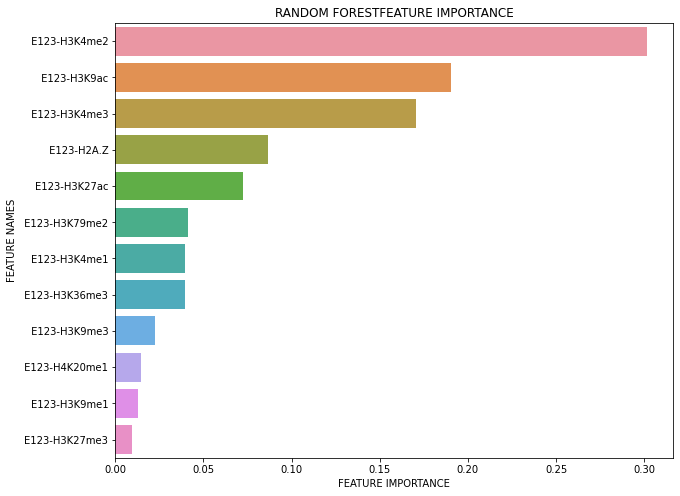

In [55]:
plot_feature_importance(classifier.feature_importances_,feature_names,'RANDOM FOREST')

# G4-Deep Model

In [56]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=layer_1, activation='relu', padding="same", input_shape=(tn_steps, tn_features)))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(Conv1D(filters=32, kernel_size=layer_2, activation="sigmoid", padding="same"))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(1))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 12, 64)            384       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 4, 64)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4, 32)             6176      
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3

In [57]:
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', save_best_only=True)

In [58]:
History = model.fit(train_X, train_Y, validation_split=0.33, epochs=30, shuffle=True, callbacks= mc, verbose=1)

Epoch 1/30
3667/3667 [==============================] - 51s 6ms/step - loss: 0.0082 - acc: 0.9900 - val_loss: 0.0065 - val_acc: 0.9917
Epoch 2/30
3667/3667 [==============================] - 22s 6ms/step - loss: 0.0065 - acc: 0.9917 - val_loss: 0.0063 - val_acc: 0.9918
Epoch 3/30
3667/3667 [==============================] - 22s 6ms/step - loss: 0.0061 - acc: 0.9924 - val_loss: 0.0058 - val_acc: 0.9924
Epoch 4/30
3667/3667 [==============================] - 20s 5ms/step - loss: 0.0059 - acc: 0.9926 - val_loss: 0.0057 - val_acc: 0.9928
Epoch 5/30
3667/3667 [==============================] - 20s 6ms/step - loss: 0.0057 - acc: 0.9928 - val_loss: 0.0057 - val_acc: 0.9927
Epoch 6/30
3667/3667 [==============================] - 21s 6ms/step - loss: 0.0056 - acc: 0.9928 - val_loss: 0.0056 - val_acc: 0.9929
Epoch 7/30
3667/3667 [==============================] - 21s 6ms/step - loss: 0.0055 - acc: 0.9931 - val_loss: 0.0056 - val_acc: 0.9928
Epoch 8/30
3667/3667 [==============================] -

In [59]:
from keras.models import load_model
model = load_model('best_model.h5')

# G4-Deep Model Accuracy and Loss Plots

In [60]:
import matplotlib.pyplot as plt
history = History.history


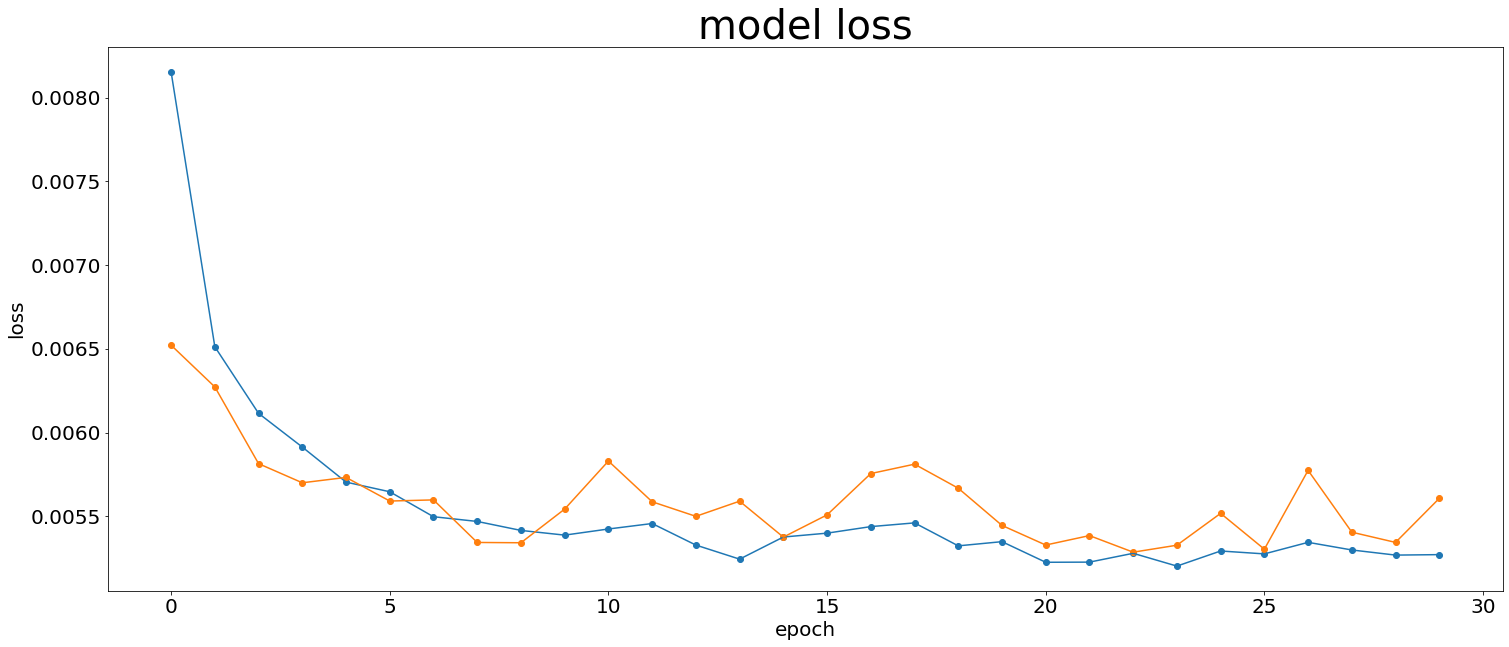

In [61]:
lenx = np.arange(len(history['loss']))


plt.figure(figsize=(25,10))        
plt.plot(history['loss'], label='Loss')     
plt.plot(history['val_loss'], label='Validation Loss')
plt.scatter(lenx,history['loss'])
plt.scatter(lenx,history['val_loss'])
        
plt.title('model loss', fontsize=40)
plt.ylabel('loss', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

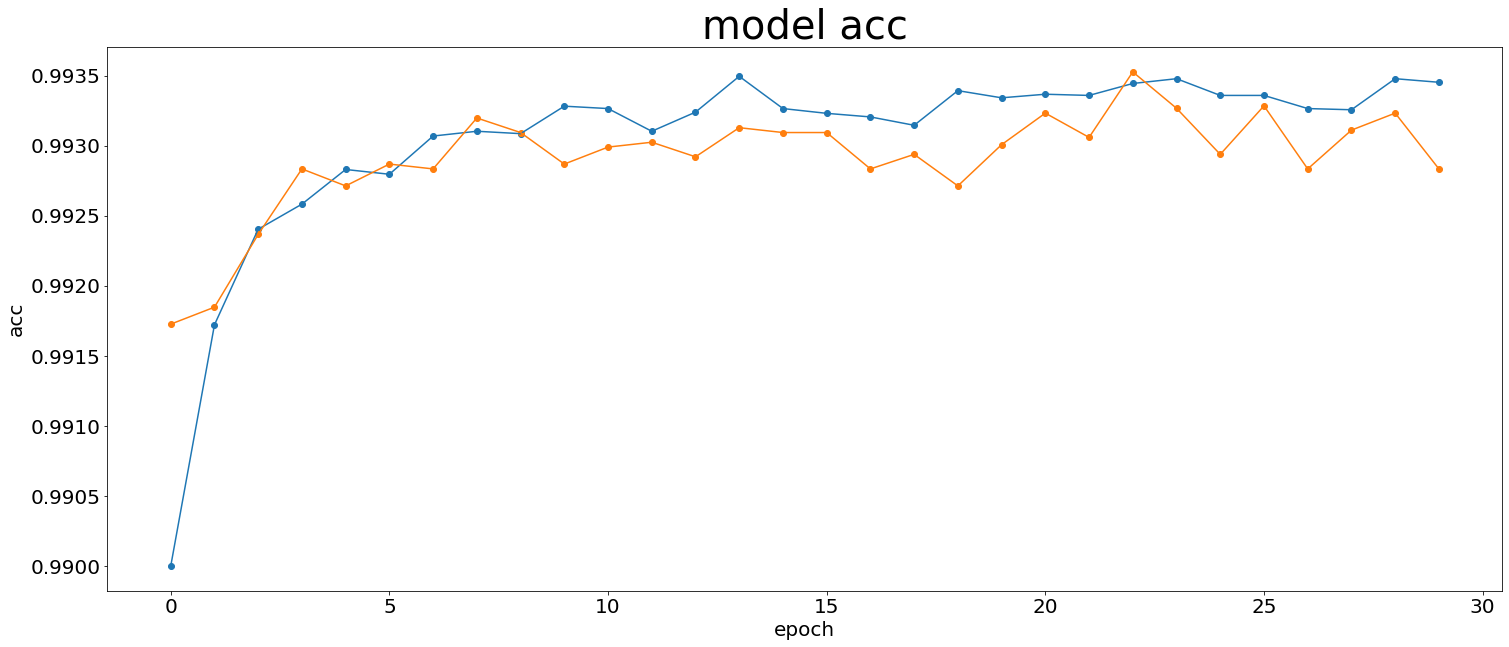

In [62]:
lenx = np.arange(len(history['acc']))


plt.figure(figsize=(25,10))        
plt.plot(history['acc'], label='Accuracy')     
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.scatter(lenx,history['acc'])
plt.scatter(lenx,history['val_acc'])
        
plt.title('model acc', fontsize=40)
plt.ylabel('acc', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

## G4-Deep Model Accuracy and Loss performance on Test Dataset

In [63]:
test_X

,3,4,5,6,7,8,9,10,11,12,13,14
0,5,1,3,6,9,13,2,5,11,8,2,11
1,9,3,8,18,25,5,42,42,6,12,9,12
2,5,1,2,1,5,19,5,2,3,5,2,7
3,3,0,3,1,12,3,1,0,2,1,0,2
4,2,7,3,3,14,2,4,3,6,8,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...
43770,2,1,1,7,10,5,4,2,5,2,2,21
43771,3,2,3,6,23,1,5,4,4,4,2,6
43772,1,0,1,2,5,1,2,0,2,3,0,1
43773,1,2,3,6,8,6,2,6,4,1,1,1


In [64]:
test_X_np = np.array(test_X)
test_X_np = test_X_np.reshape(len(test_X.index),len(test_X.columns),1)

Model Accuracy and Test

In [65]:
test_score = model.evaluate(test_X_np, np.array(test_Y))
test_loss = format(test_score[0], '.3f')
test_acc = format(test_score[1], '.3f')

1368/1368 [==============================] - 4s 3ms/step - loss: 0.0049 - acc: 0.9938


Model Threshold Setting

In [66]:
thr=[0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3]
thr

[0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3]

In [67]:
F1_List=[]
test_res = model.predict(test_X_np)
for threshold in thr:
  test_results = []

  for eachVal in test_res:
    if eachVal>threshold:
      test_results.append(1)
    else:
      test_results.append(0)
  
  y_test_class = np.array(test_Y).reshape((np.array(test_Y).shape[0],))
  y_pred_class=np.array(test_results)
  
  from sklearn import metrics
  # save confusion matrix and slice into four pieces
  confusion = metrics.confusion_matrix(y_test_class, y_pred_class)
  print(confusion)
  #[row, column]
  TP = confusion[1, 1]
  TN = confusion[0, 0]
  FP = confusion[0, 1]
  FN = confusion[1, 0]

  sensitivity = TP / float(FN + TP)
  precision = TP / float(TP + FP)

  F1 = 2*(sensitivity * precision) / (sensitivity + precision)
  F1_List.append(F1)
threshold_value=thr[F1_List.index(max(F1_List))]


[[41865   128]
 [  140  1642]]
[[41855   138]
 [  124  1658]]
[[41846   147]
 [  114  1668]]
[[41826   167]
 [  103  1679]]
[[41807   186]
 [   89  1693]]
[[41789   204]
 [   84  1698]]
[[41778   215]
 [   73  1709]]
[[41762   231]
 [   66  1716]]


In [68]:
threshold_value

0.55

### G4 Prediction by Model in Test Dataset

In [69]:
test_res = model.predict(test_X_np)

In [70]:
test_res

array([[3.6709671e-06],
       [1.2243864e-05],
       [2.3629006e-07],
       ...,
       [3.7804801e-07],
       [3.1541521e-07],
       [1.7134296e-06]], dtype=float32)

In [71]:
test_results = []

for eachVal in test_res:
  if eachVal>threshold_value:
    test_results.append(1)
  else:
    test_results.append(0)

In [72]:
sum(np.array(test_results))

1815

In [73]:
sum(np.array(test_results))/len(test_results)

0.041462021701884635

In [74]:
train_X.shape

(175100, 12, 1)

### AUC SCORE, Sensitivity, Specificity and F1 Prediction

In [75]:
# calculate the percentage of zeros
1 - np.array(test_Y).mean()

0.9592918332381496

In [76]:
# calculate null accuracy in a single line of code
# only for binary classification problems coded as 0/1
max(np.array(test_Y).mean(), 1 - np.array(test_Y).mean())

0.9592918332381496

In [77]:
# calculate null accuracy (for multi-class classification problems)
test_Y.value_counts().head(1) / len(np.array(test_Y))

label
0        0.959292
dtype: float64

In [78]:
y_test_class = np.array(test_Y).reshape((np.array(test_Y).shape[0],))
y_pred_class=np.array(test_results)

In [79]:
y_test_class

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [80]:
# print the first 25 true and predicted responses
print('True:', y_test_class[0:25])
print('False:', y_pred_class[0:25])

True: [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
False: [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [81]:
from sklearn import metrics
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test_class, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[41846   147]
 [  114  1668]]


In [82]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test_class, y_pred_class))

0.9940376927470017
0.9940376927470017


In [83]:
false_negative_rate= FN / float(FN + TP)
print (false_negative_rate)

0.06397306397306397


In [84]:
false_negative_rate= FN / float(FN + TP)
print (false_negative_rate)

0.06397306397306397


In [85]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test_class, y_pred_class))

0.936026936026936
0.936026936026936


In [86]:
specificity = TN / (TN + FP)

print(specificity)

0.9964994165694282


In [87]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.003500583430571762
0.003500583430571802


In [88]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test_class, y_pred_class))


0.9190082644628099
0.9190082644628099


In [89]:
F1_Score = 2*(sensitivity * precision) / (sensitivity + precision)
print(F1_Score)

0.9274395329441201


In [90]:
AUC_Score=metrics.roc_auc_score(y_test_class, np.array(test_res))
AUC_Score

0.9978092388494121

### AUROC Curve

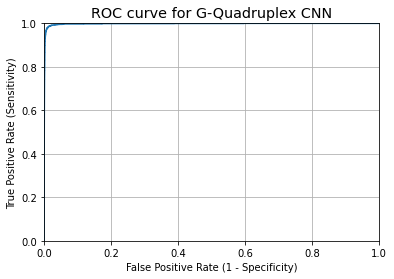

In [91]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test_class, np.array(test_res))

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for G-Quadruplex CNN')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [92]:
thresholds.mean()

0.34328988

## G4-Chip File Evaluation

In [93]:
if chip_file!="":
  df3=pd.read_csv(path+chip_file, sep="\t", header=None)
  df4= df3.reset_index()
  from sklearn.preprocessing import OrdinalEncoder
  ord_enc = OrdinalEncoder()
  df4["chr_name"] = ord_enc.fit_transform(df4[[0]])
  df4['dist']=df4[2]-df4[1]
  df4.drop(['index', 0,1,2,"dist","chr_name"],axis=1, inplace=True)
  df4_np = np.array(df4)
  df4_np = df4_np.reshape(len(df4.index),len(df4.columns),1)
  ones = np.array([1]*len(df4.index))

In [94]:
if chip_file=="":
  chip_loss = "Not_Specified"
  chip_acc =  "Not_Specified"
  
else:
  score=model.evaluate(df4_np, ones)
  chip_loss = format(score[0], '.3f')
  chip_acc = format(score[1], '.3f')

280/280 [==============================] - 1s 3ms/step - loss: 0.0527 - acc: 0.9395


## Genome File Evaluation

In [95]:
df5= pd.read_csv(path + genome_file, sep="\t", header=None)


In [96]:
df_nchrM1= df5[df5[0] != "chrM"]
df_nchrM1["sum"]= df_nchrM1.drop([0,1,2], axis=1).sum(axis=1)
df_nchrM1_0=df_nchrM1[df_nchrM1['sum'] != 0]
df5= df_nchrM1_0.drop(['sum'], axis=1)
df5

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,chr7,25023140,25024140,60,12,16,20,22,5,16,10,38,22,4,12
1,chr4,183623304,183624304,3,4,6,4,13,15,5,1,9,5,3,5
2,chr1,51445646,51446646,44,43,92,14,16,3,15,276,140,193,70,6
3,chr13,55554180,55555180,6,0,2,2,12,2,6,1,5,1,0,3
4,chr1,60056992,60057992,2,0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,chr10,134491481,134492481,7,5,2,9,17,4,1,3,1,0,3,5
239996,chr4,4911138,4912138,1,2,6,5,9,8,7,1,6,3,4,14
239997,chr6,77651100,77652100,4,4,1,5,23,4,6,2,2,2,3,1
239998,chrX,94938909,94939909,2,1,2,4,12,1,2,3,3,2,1,5


In [97]:
df6= df5.reset_index()

df6

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,chr7,25023140,25024140,60,12,16,20,22,5,16,10,38,22,4,12
1,1,chr4,183623304,183624304,3,4,6,4,13,15,5,1,9,5,3,5
2,2,chr1,51445646,51446646,44,43,92,14,16,3,15,276,140,193,70,6
3,3,chr13,55554180,55555180,6,0,2,2,12,2,6,1,5,1,0,3
4,4,chr1,60056992,60057992,2,0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209937,239995,chr10,134491481,134492481,7,5,2,9,17,4,1,3,1,0,3,5
209938,239996,chr4,4911138,4912138,1,2,6,5,9,8,7,1,6,3,4,14
209939,239997,chr6,77651100,77652100,4,4,1,5,23,4,6,2,2,2,3,1
209940,239998,chrX,94938909,94939909,2,1,2,4,12,1,2,3,3,2,1,5


In [98]:
df6.drop(['index', 0,1,2],axis=1, inplace=True)

In [99]:
df6

,3,4,5,6,7,8,9,10,11,12,13,14
0,60,12,16,20,22,5,16,10,38,22,4,12
1,3,4,6,4,13,15,5,1,9,5,3,5
2,44,43,92,14,16,3,15,276,140,193,70,6
3,6,0,2,2,12,2,6,1,5,1,0,3
4,2,0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
209937,7,5,2,9,17,4,1,3,1,0,3,5
209938,1,2,6,5,9,8,7,1,6,3,4,14
209939,4,4,1,5,23,4,6,2,2,2,3,1
209940,2,1,2,4,12,1,2,3,3,2,1,5


In [100]:
df6_np = np.array(df6)
df6_np = df6_np.reshape(len(df6.index),len(df6.columns),1)
one = np.array([0]*len(df6.index))

In [101]:
score1=model.evaluate(df6_np, one)
genome_loss = format(score1[0], '.3f')
genome_acc = format(score1[1], '.3f')

6561/6561 [==============================] - 21s 3ms/step - loss: 0.0031 - acc: 0.9960


In [102]:
res1 = model.predict(df6_np)

In [103]:
res1

array([[1.2202231e-04],
       [3.3403401e-07],
       [1.2861039e-03],
       ...,
       [3.4561850e-08],
       [4.8841741e-07],
       [4.8172503e-04]], dtype=float32)

In [104]:
results1 = []

for eachVal in res1:
  if eachVal<threshold_value:
    results1.append(1)
  else:
    results1.append(0)

In [105]:
sum(np.array(results1))

209172

In [106]:
sum(np.array(results1))/len(df6.index)

0.9963323203551457

## G4-Na-Seq File Evaluation

In [107]:
if seq_file!="":
  df7=pd.read_csv(path+seq_file, sep="\t", header=None)
  df_nchrM2= df7[df7[0] != "chrM"]
  df_nchrM2["sum"]= df_nchrM2.drop([0,1,2], axis=1).sum(axis=1)
  df_nchrM2_0=df_nchrM2[df_nchrM2['sum'] != 0]
  df7= df_nchrM2_0.drop(['sum'], axis=1)
  df8= df7.reset_index()
  df8.drop(['index', 0,1,2],axis=1, inplace=True)
  df8_np = np.array(df8)
  df8_np = df8_np.reshape(len(df8.index),len(df8.columns),1)
  one1 = np.array([1]*len(df8.index))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [108]:
if seq_file=="":
  seq_loss = "Not_Specified"
  seq_acc =  "Not_Specified"
  
else:
  score2=model.evaluate(df8_np, one1)
  seq_loss = format(score2[0], '.3f')
  seq_acc = format(score2[1], '.3f')

12673/12673 [==============================] - 41s 3ms/step - loss: 0.9053 - acc: 0.0844


## G4-Li-Seq File Evaluation

In [109]:
if Li_seq_file!="":
  df9=pd.read_csv(path+Li_seq_file, sep="\t", header=None)
  df_nchrM3= df9[df9[0] != "chrM"]
  df_nchrM3["sum"]= df_nchrM3.drop([0,1,2], axis=1).sum(axis=1)
  df_nchrM3_0=df_nchrM3[df_nchrM3['sum'] != 0]
  df9= df_nchrM3_0.drop(['sum'], axis=1)
  df10= df9.reset_index()
  df10.drop(['index', 0,1,2],axis=1, inplace=True)
  df10_np = np.array(df10)
  df10_np = df10_np.reshape(len(df10.index),len(df10.columns),1)
  one2 = np.array([1]*len(df10.index))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [110]:
if Li_seq_file=="":
  Li_seq_loss = "Not_Specified"
  Li_seq_acc =  "Not_Specified"
  
else:
  score3=model.evaluate(df10_np, one2)
  Li_seq_loss = format(score3[0], '.3f')
  Li_seq_acc = format(score3[1], '.3f')

24347/24347 [==============================] - 78s 3ms/step - loss: 0.9445 - acc: 0.0474


## G4- Target File Evaluation and Targetted G4s Extraction

In [111]:
df_promoter=pd.read_csv(path+promoter_file, sep="\t", header=None)


In [112]:
df_promoter_nchrM3= df_promoter[df_promoter[0] != "chrM"]
df_promoter_nchrM3["sum"]= df_promoter_nchrM3.drop([0,1,2], axis=1).sum(axis=1)
df_promoter_nchrM3_0=df_promoter_nchrM3[df_promoter_nchrM3['sum'] != 0]
df_promoter= df_promoter_nchrM3_0.drop(['sum'], axis=1)
df_promoter

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,chr1,17436,18436,0,1,0,5,2,0,6,1,0,0,0,3
1,chr1,17436,18436,0,1,0,5,2,0,6,1,0,0,0,3
2,chr1,29370,30370,0,1,2,0,0,0,0,0,1,2,1,0
6,chr1,567793,568793,6,6,4,20,16,20,6,8,9,9,9,16
7,chr1,714068,715068,6,82,79,2,5,1,0,39,73,78,40,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23429,chrX,154298694,154299694,7,171,170,7,8,2,3,66,161,202,92,4
23430,chrX,154443700,154444700,47,247,202,12,10,3,3,55,264,226,284,7
23431,chrX,154493874,154494874,2,2,3,2,11,2,2,1,2,1,1,1
23432,chrX,154563990,154564990,58,84,42,8,6,3,2,11,77,64,114,15


In [113]:
df1_promoter= df_promoter.reset_index()

df1_promoter

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,chr1,17436,18436,0,1,0,5,2,0,6,1,0,0,0,3
1,1,chr1,17436,18436,0,1,0,5,2,0,6,1,0,0,0,3
2,2,chr1,29370,30370,0,1,2,0,0,0,0,0,1,2,1,0
3,6,chr1,567793,568793,6,6,4,20,16,20,6,8,9,9,9,16
4,7,chr1,714068,715068,6,82,79,2,5,1,0,39,73,78,40,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23280,23429,chrX,154298694,154299694,7,171,170,7,8,2,3,66,161,202,92,4
23281,23430,chrX,154443700,154444700,47,247,202,12,10,3,3,55,264,226,284,7
23282,23431,chrX,154493874,154494874,2,2,3,2,11,2,2,1,2,1,1,1
23283,23432,chrX,154563990,154564990,58,84,42,8,6,3,2,11,77,64,114,15


In [114]:
target_for_extraction = df1_promoter.drop(['index'],axis=1)
df1_promoter.drop(['index', 0,1,2],axis=1, inplace=True)

In [115]:
df1_promoter

,3,4,5,6,7,8,9,10,11,12,13,14
0,0,1,0,5,2,0,6,1,0,0,0,3
1,0,1,0,5,2,0,6,1,0,0,0,3
2,0,1,2,0,0,0,0,0,1,2,1,0
3,6,6,4,20,16,20,6,8,9,9,9,16
4,6,82,79,2,5,1,0,39,73,78,40,6
...,...,...,...,...,...,...,...,...,...,...,...,...
23280,7,171,170,7,8,2,3,66,161,202,92,4
23281,47,247,202,12,10,3,3,55,264,226,284,7
23282,2,2,3,2,11,2,2,1,2,1,1,1
23283,58,84,42,8,6,3,2,11,77,64,114,15


In [116]:
target_for_extraction

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,chr1,17436,18436,0,1,0,5,2,0,6,1,0,0,0,3
1,chr1,17436,18436,0,1,0,5,2,0,6,1,0,0,0,3
2,chr1,29370,30370,0,1,2,0,0,0,0,0,1,2,1,0
3,chr1,567793,568793,6,6,4,20,16,20,6,8,9,9,9,16
4,chr1,714068,715068,6,82,79,2,5,1,0,39,73,78,40,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23280,chrX,154298694,154299694,7,171,170,7,8,2,3,66,161,202,92,4
23281,chrX,154443700,154444700,47,247,202,12,10,3,3,55,264,226,284,7
23282,chrX,154493874,154494874,2,2,3,2,11,2,2,1,2,1,1,1
23283,chrX,154563990,154564990,58,84,42,8,6,3,2,11,77,64,114,15


In [117]:
len(df1_promoter.index)

23285

In [118]:
df1_promoter_np = np.array(df1_promoter)
df1_promoter_np = df1_promoter_np.reshape(len(df1_promoter.index),len(df1_promoter.columns),1)
onez = np.array([1]*len(df1_promoter.index))

In [119]:
scorez=model.evaluate(df1_promoter_np, onez)
promoters_loss = format(scorez[0], '.3f')
promoters_acc = format(scorez[0], '.3f')

728/728 [==============================] - 2s 3ms/step - loss: 0.5580 - acc: 0.4119


In [120]:
resz = model.predict(df1_promoter_np)

In [121]:
resultsz = []

for eachVal in resz:
  if eachVal>threshold_value:
    resultsz.append(1)
  else:
    resultsz.append(0)

In [122]:
target_positions=[i for i, e in enumerate(resultsz) if e == 1]

In [123]:
targetted_G4s = target_for_extraction.iloc[target_positions, :]
target_G4s = targetted_G4s[[0,1,2]].reset_index().drop(['index'],axis=1)

In [124]:
sum(np.array(resultsz))

9348

In [125]:
sum(np.array(resultsz))/len(df1_promoter.index)

0.4014601674898003

In [126]:
target_G4s.to_csv(str(path) +str(Extracted_G4s), sep="\t", header=False, index=False)

In [127]:
save_file=str(path)+ str(loss_acc_file)

In [128]:
import pathlib
file_check = pathlib.Path(save_file)
if file_check.exists()==False:
  final_scores = [["analysis_name", analysis_name], ["cell_line", cell_line],["CNN_Model", '('+ str(layer_1) + ',' + str(layer_2) + ',' + str(pool_size)+')'],  ["randomforest_accuracy", format(randomforest_accuracy, '.3f')], 
                      ["test_acc", test_acc], ["test_loss", test_loss], 
                      ["target_acc", promoters_acc], ["target_loss", promoters_loss], ["chip_acc", chip_acc],
                      ["chip_loss", chip_loss], ["seq_acc", seq_acc], ["seq_loss", seq_loss], ["Li_seq_acc", Li_seq_acc], 
                      ["Li_seq_loss", Li_seq_loss], ["genome_acc", genome_acc], ["genome_loss", genome_loss]]
  Score_File= pd.DataFrame(final_scores)
  Final_Score_File = Score_File.T
  Final_Score_File.to_csv(save_file, header=False)
else:
  final_scores = [[0], [analysis_name], [cell_line],['('+ str(layer_1) + ',' + str(layer_2) + ',' + str(pool_size)+')'],  [format(randomforest_accuracy, '.3f')], 
                      [test_acc], [test_loss],
                      [promoters_acc], [promoters_loss], [chip_acc],
                      [chip_loss], [seq_acc], [seq_loss], [Li_seq_acc], 
                      [Li_seq_loss], [genome_acc], [genome_loss]]                      
  Score_File= pd.DataFrame(final_scores)
  Score_File_1 = Score_File.T
  Previous_Score_File = pd.read_csv(save_file, header=None)
  #Previous_Score_File.drop([0],axis=1, inplace=True)
  Final_Score_File = pd.concat([Previous_Score_File, Score_File_1]).reset_index()
  Final_Score_File.drop(['index',0],axis=1, inplace=True)
  Final_Score_File.to_csv(save_file, header=False)

In [129]:
save_file1=str(path) + str(model_performance_record)

In [130]:
import pathlib
file_check1 = pathlib.Path(save_file1)
if file_check1.exists()==False:
  final_scores1 = [["analysis_name", analysis_name], ["cell_line", cell_line], ["CNN_Model", '('+ str(layer_1) + ',' + str(layer_2) + ',' + str(pool_size)+')'], 
                      ["AUC_Score", format(AUC_Score, '.3f')],
                      ["Precision", format(precision, '.3f')], 
                      ["Recall", format(sensitivity, '.3f')],
                      ["Specificity", format(specificity, '.3f')],
                      ["feature_1", feature_1],["feature_2", feature_2],["feature_3", feature_3],["feature_4", feature_4], ["feature_5",feature_5]]
  Score_File1= pd.DataFrame(final_scores1)
  Final_Score_File1 = Score_File1.T
  Final_Score_File1.to_csv(save_file1, header=False)
else:
  final_scores1 = [[0], ["main_file"], [cell_line], ['('+ str(layer_1) + ',' + str(layer_2) + ',' + str(pool_size)+')'], 
                      [format(AUC_Score, '.3f')],
                      [format(precision, '.3f')], [format(sensitivity, '.3f')],
                      [format(specificity, '.3f')], 
                      [feature_1],[feature_2],[feature_3],[feature_4],[feature_5]]
  Score_File1= pd.DataFrame(final_scores1)
  Score_File_1_1 = Score_File1.T
  Previous_Score_File1 = pd.read_csv(save_file1, header=None)
  #Previous_Score_File.drop([0],axis=1, inplace=True)
  Final_Score_File1 = pd.concat([Previous_Score_File1, Score_File_1_1]).reset_index()
  Final_Score_File1.drop(['index',0],axis=1, inplace=True)
  Final_Score_File1.to_csv(save_file1, header=False)

In [131]:
 Final_Score_File

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,analysis_name,cell_line,CNN_Model,randomforest_accuracy,test_acc,test_loss,target_acc,target_loss,chip_acc,chip_loss,seq_acc,seq_loss,Li_seq_acc,Li_seq_loss,genome_acc,genome_loss
1,sample_analysis,E123,"(5,3,3)",0.994,0.994,0.005,0.572,0.572,0.938,0.053,0.083,0.905,0.047,0.944,0.996,0.003
2,sample_analysis,E123,"(5,3,3)",0.993,0.994,0.005,0.558,0.558,0.940,0.053,0.084,0.905,0.047,0.944,0.996,0.003


In [132]:
 Final_Score_File1

,1,2,3,4,5,6,7,8,9,10,11,12
0,analysis_name,cell_line,CNN_Model,AUC_Score,Precision,Recall,Specificity,feature_1,feature_2,feature_3,feature_4,feature_5
1,sample_analysis,E123,"(5,3,3)",0.998,0.914,0.932,0.996,E123-H3K4me2,E123-H3K9ac,E123-H3K4me3,E123-H2A.Z,E123-H3K27ac
2,main_file,E123,"(5,3,3)",0.998,0.919,0.936,0.996,E123-H3K4me2,E123-H3K9ac,E123-H3K4me3,E123-H2A.Z,E123-H3K27ac


In [133]:
target_G4s

,0,1,2
0,chr1,714068,715068
1,chr1,762902,763902
2,chr1,761970,762970
3,chr1,860120,861120
4,chr1,894679,895679
...,...,...,...
9343,chrX,154299547,154300547
9344,chrX,154298694,154299694
9345,chrX,154443700,154444700
9346,chrX,154563990,154564990
